# Customer Lifetime Value

## Fake data

In [2]:
import pandas as pd
import numpy as np
from faker import Faker

def create_customer_data(num_customers=1000):
    fake = Faker()
    np.random.seed(42)
    
    customer_data = []
    
    for _ in range(num_customers):
        customer_id = fake.uuid4()
        price = round(np.random.uniform(10, 1000), 2)
        gross_margin = round(np.random.uniform(0.1, 0.9), 2)
        retention_rate = round(np.random.uniform(0.5, 1), 2)
        wacc = round(np.random.uniform(0.01, 0.2), 2)
        
        customer_data.append([
            customer_id,
            price,
            gross_margin,
            retention_rate,
            wacc
        ])
    
    columns = ['customer_id', 'price', 'gross_margin', 'retention_rate', 'wacc']
    return pd.DataFrame(customer_data, columns=columns)

# Generate the data
data = create_customer_data()
data

,customer_id,price,gross_margin,retention_rate,wacc
0,281050c4-857e-481f-9b84-d2744a989fb2,380.79,0.86,0.87,0.12
1,68868fbd-82f7-4c5c-9a8a-fa163f340f69,164.46,0.22,0.53,0.17
2,b9df70a1-a853-4401-a5dd-7d3fc05a83f2,605.10,0.67,0.51,0.19
3,18cbcc26-e985-40c8-87bb-911c58287671,834.12,0.27,0.59,0.04
4,3cefb1e8-5f54-4404-afac-ab9e4060f9e4,311.20,0.52,0.72,0.07
...,...,...,...,...,...
995,8b96ba21-77ba-4b98-895a-f4001129e004,834.04,0.74,0.61,0.05
996,bb8af442-6690-4c91-bb4d-410e81e0c124,819.13,0.84,0.55,0.10
997,f6b03cfc-1588-4efb-a920-be739062f55c,344.08,0.80,0.54,0.05
998,b532cb54-f9ab-4c33-896f-95d258c6e3ff,754.94,0.14,0.75,0.09


## Calculate CLV

$$\mathbb{E}[\text{CLV}] = \dfrac{m (1 + d)}{1 + d -r}$$

- $m$ is contribution margin
- $d$ is discount rate or $\text{WACC}$
- $r$ is retention rate

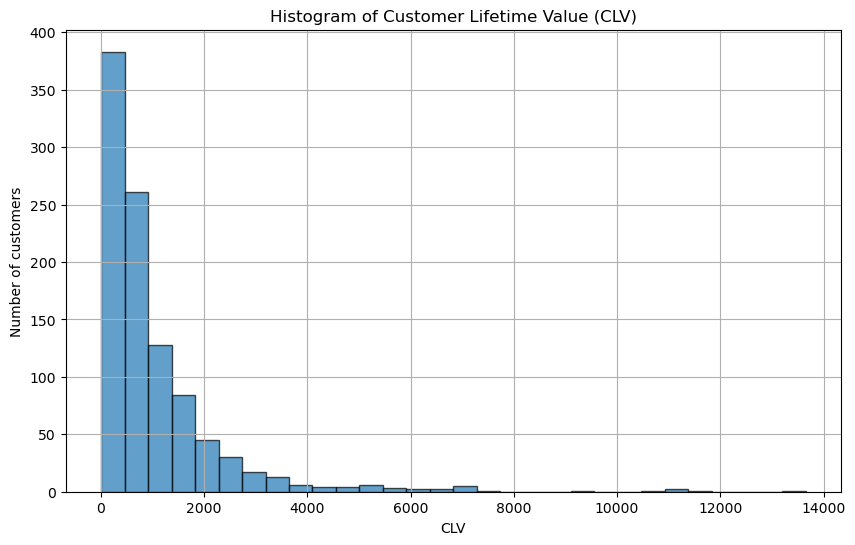

Customer Equity: $1,044,536.45


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_clv(data):
    # Extract necessary columns
    price = data['price']
    gross_margin = data['gross_margin']
    retention_rate = data['retention_rate']
    wacc = data['wacc']
    
    # Calculate m, r, d
    m = price * gross_margin
    r = retention_rate
    d = wacc
    
    # Calculate CLV
    clv = (m * (1 + d)) / (1 + d - r)
    
    # Plot histogram of CLV
    plt.figure(figsize=(10, 6))
    plt.hist(clv, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of Customer Lifetime Value (CLV)')
    plt.xlabel('CLV')
    plt.ylabel('Number of customers')
    plt.grid(True)
    plt.show()
    
    # Calculate and print Customer Equity
    customer_equity = np.sum(clv)
    print(f"Customer Equity: ${customer_equity:,.2f}")
    
    plt.show()

# Example usage
# Assuming 'data' is a DataFrame containing the relevant columns
calculate_clv(data)